# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 9304 Цаплин Илья и Силкин Владислав. Вариант №11

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования. 

## Основные теоретические положения

Дискретный прямоугольный импульс:
$$s(k) = \begin{cases}
U, & \quad n_0 \leq k \leq n0+n_{imp}-1\\
0, & \quad \text{else}
\end{cases},\quad k\in \mathbb Z$$

Дискретный гармонический сигнал:
$$s(k)=C \cdot cos(\hat{\omega}_0k),\quad k\in \mathbb Z$$

Пример линейной комбинации дискретных гармонических сигналов:
$$ s(k) = a_1x_1(k)+a_2x_2(k)+a_3x_3(k),\quad k\in \mathbb Z$$
где
$$x_i(k)=B_isin(\hat{\omega}_ik),\quad i=1,2,3$$

Периодический прямоугольный импульс:
<p style='text-align: center; font-size:20px'>
$s(k) = A \cdot (-1)^{\left\lfloor\frac{2k}{T}\right\rfloor},\quad k\in \mathbb Z$
</p>

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей.  
Результаты подкрепить соответствующими графиками и выводами. 

## Выполнение работы

Пункт 1. Смоделируем дискретный прямоугольный импульс.  
Дискретный прямоугольный импульс выражается при помощи следующей формулы:
$$s_1(k) = \begin{cases}
U, & \quad n_0 \leq k \leq n_0+n_{imp}-1\\
0, & \quad \text{else}
\end{cases},\quad k\in \mathbb Z$$,
где $U$ - амплитуда импульса, $n_0$ - начальный момент импульса, $n_{imp}$ - длина импульса  

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

# Исходные данные
Nb = 11
N = 30 + Nb % 5
a = (-1) ** Nb * (0.8 + 0.005 * Nb)
C = 1 + Nb % 5
omega = math.pi / (6 + Nb % 5)
U = 11
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B_list = [1.5 + Nb % 5, 5.7 - Nb % 5, 2.2 + Nb % 5]
omega_list = [math.pi / (4 + Nb % 5), math.pi / (8 + Nb % 5), math.pi / (16 + Nb % 5)]
a_list = [1.5 - Nb % 5, 0.7 + Nb % 5, 1.4 + Nb % 5]

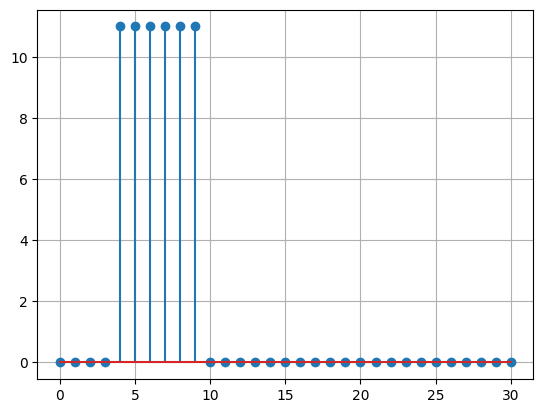

In [2]:
# Функция отрисовки
def show_plot(X, Y, title=None):
    plt.clf()
    plt.grid()
    plt.stem(X, Y)
    if title is not None:
        plt.title(title)
    plt.show()

# Прямоугольный импульс
def square_wave(k):
    return U if n0 <= k <= n0 + n_imp - 1 else 0

square_wave_values = [square_wave(n) for n in range(N)] 
show_plot(range(N), square_wave_values)

Пункт 2.  
Смоделируем линейную комбинацию дискретных гармонических сигналов $s_2(k)$:
$$ s_2(k) = a_1x_1(k)+a_2x_2(k)+a_3x_3(k),\quad k\in \mathbb Z$$
где
$$x_i(k)=B_isin(\hat{\omega}_ik),\quad i=1,2,3$$  
на интервале времени $n \in [0, 5N - 1]$  
Вычислим среднее значение, энергию и среднюю мощность последовательности $s_2(k)$  
**a.** Операции при моделировании:  
$s_2(k)$ составляется из суммы гармонических сигналов $x_i$, каждый из которых умножается на константу $a_i$.

**b.** Определение указанных характеристик

Среднее значение:
$$mean\_s_2 = \frac{\sum_{k=0}^{N-1} s_2(k)}{N}$$
Энергия:
$$E = \sum_{k=0}^{N-1}|s_2(k)|^2$$
Средняя мощность:
$$P = \frac{E}{T}$$
, где $T$ - размер интервала времени

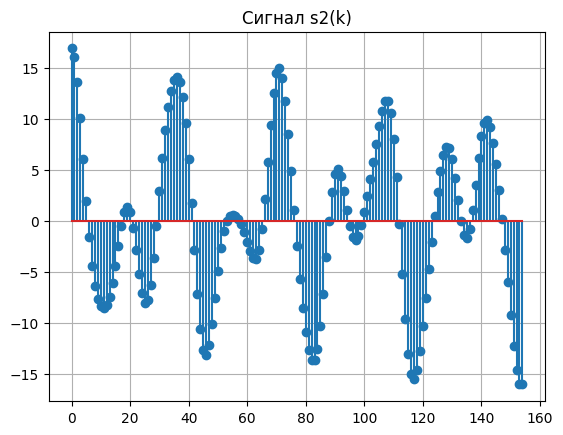

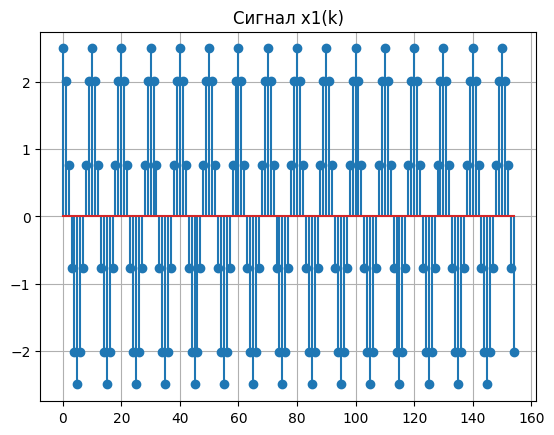

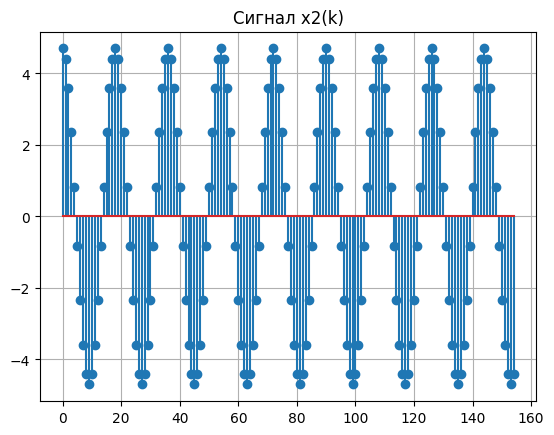

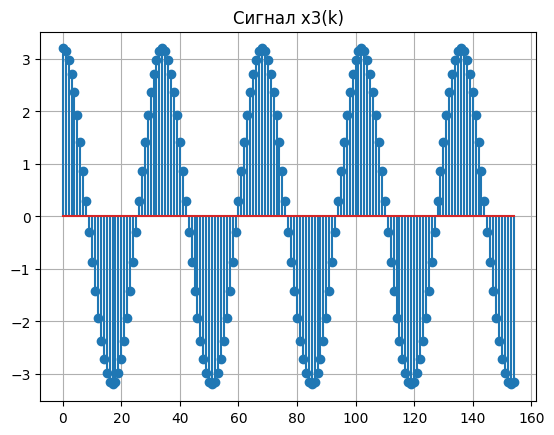

mean_s2 = -0.0890798544880726
E =  9971.807466315968
P =  64.33424171816753


In [3]:
def linear_harmonic(N, B_list, omega_list, a_list):
    s_2 = []
    x = []
    for i in range(3):
        x_i = []
        for n in range(5*N):
            x_i.append(B_list[i]*math.cos(omega_list[i]*n))
        x.append(x_i)
    s_2 = [a_list[0]*x[0][n]+a_list[1]*x[1][n]+a_list[2]*x[2][n] for n in range(5*N)]
    show_plot(range(5*N), s_2, title="Сигнал s2(k)")
    for i in range(3):
        show_plot(range(5*N), x[i], title=f"Сигнал x{i+1}(k)")
    mean_s2 = np.mean(s_2)
    print("mean_s2 =", mean_s2)
    E = np.sum([s_2[n]**2 for n in range(len(s_2))])
    print("E = ", E)
    P = E/(5*N)
    print("P = ", P)

linear_harmonic(N, B_list, omega_list, a_list)

| Величина | Значение |
|----------|------------|
| Среднее значение| -0.0890799 |
| Энергия | 9971.80747 |
| Средняя мощность | 64.3342417 |

Пункт 3. Смоделируем дискретный сигнал $s_3(k)$ представляющего собой дискретный гармонический сигнал  
<p style='text-align: center'>
$s(k) = C \cdot cos(\hat{\omega}_0k)$
</p>
с экспоненциальной огибающей $|a|^k$ на интервале $n \in [0, N - 1]$   

Формула дискретного сигнала $s_3(k)$:
<p style='text-align: center'>
$s_3(k) = |a|^k \cdot C \cdot cos(\hat{\omega}_0k)$.
</p>

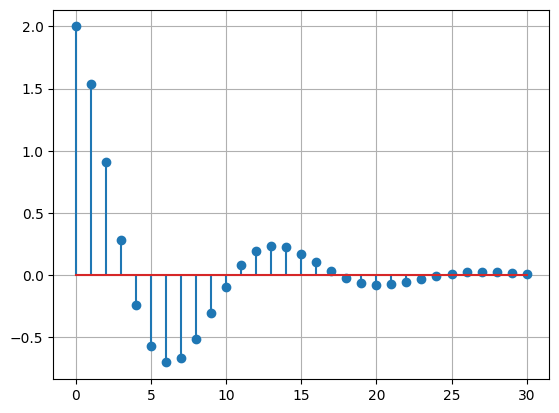

In [4]:
# Гармоническй сигнал
def harmonic_signal(k):
    return abs(a)**k * C * math.cos(omega * k)

harmonic_signal_values = [harmonic_signal(n) for n in range(N)] 
show_plot(range(N), harmonic_signal_values)

Пункт 4. Смоделируем сигнал $s_4(k)$ представляющий собой дискретные прямоугольные импульсы амплитой $U$ и длительностью $n_{imp}$, повторяющиеся с периодом вдвое большим продолжительности.  
Общая формула периодического прямоугольного импульса:
<p style='text-align: center; font-size:20px'>
$S(k) = A \cdot (-1)^{\left\lfloor\frac{2k}{T}\right\rfloor}$
</p>
, где $A$ - амплитуда сигнала, $T$ - период сигнала  

Для того, чтобы получить $s_4(k)$, необходимо сместить периодический прямоугольный сигнал с периодом $n_{imp} \cdot 2$ и амплитудой $U/2$ на $U/2$ по оси OY.  
Полученная формула:
<p style='text-align: center; font-size:20px'>
$s_4(k) = \frac{U}{2} \cdot (-1)^{\left\lfloor\frac{2k}{2n_{imp}}\right\rfloor} + \frac{U}{2}$
</p>

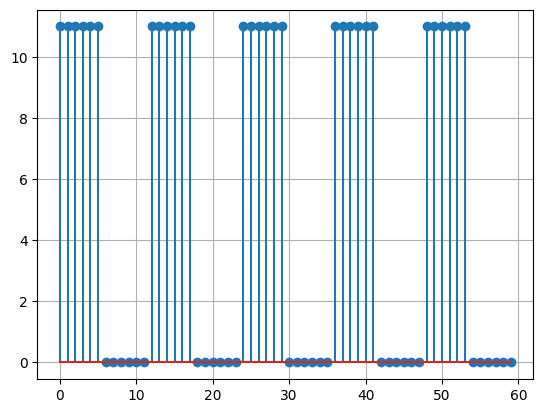

In [5]:
def square_wave_periodic(k, T):
    return U / 2 * (-1) ** math.floor(2 * k / T) + U / 2

periodic_values = [square_wave_periodic(n, n_imp*2) for n in range(n_imp * 2 * 5)]
show_plot(range(n_imp * 2 * 5), periodic_values)

## Выводы
Было изучено математическое описание линейных комбинаций дискретных гармонических сигналов и получены навыки работы с  программными средствами их моделирования.  
В ходе выполнения работы были смоделированы следующие дискретные сигналы:
* Дискретный прямоугольный импульс
* Линейная комбинация дискретных гармонических сигналов
* Дискретный сигнал, представляющий собой дискретный гармонический сигнал с экспоненциальной огибающей
* Периодическая последовательность дискретных прямоугольных импульсов.